# Get The Data

In [14]:
from pathlib import Path
import tarfile
import pandas as pd
import urllib.request

def load_data():
    tarfile_path=Path("myData/housing.tgz")
    if not tarfile_path.is_file():
        Path("myData").mkdir(parents=True,exist_ok=True)
        url= "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarfile_path)
        with tarfile.open(tarfile_path) as housing_tarfile:
            housing_tarfile.extractall(path="myData")
    return pd.read_csv(Path("myData/housing/housing.csv"))
housing=load_data()
            

/var/folders/bv/4v76sz4s6hs6w1z89wsx1fd80000gn/T/ipykernel_1131/2052579905.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarfile.extractall(path="myData")


In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

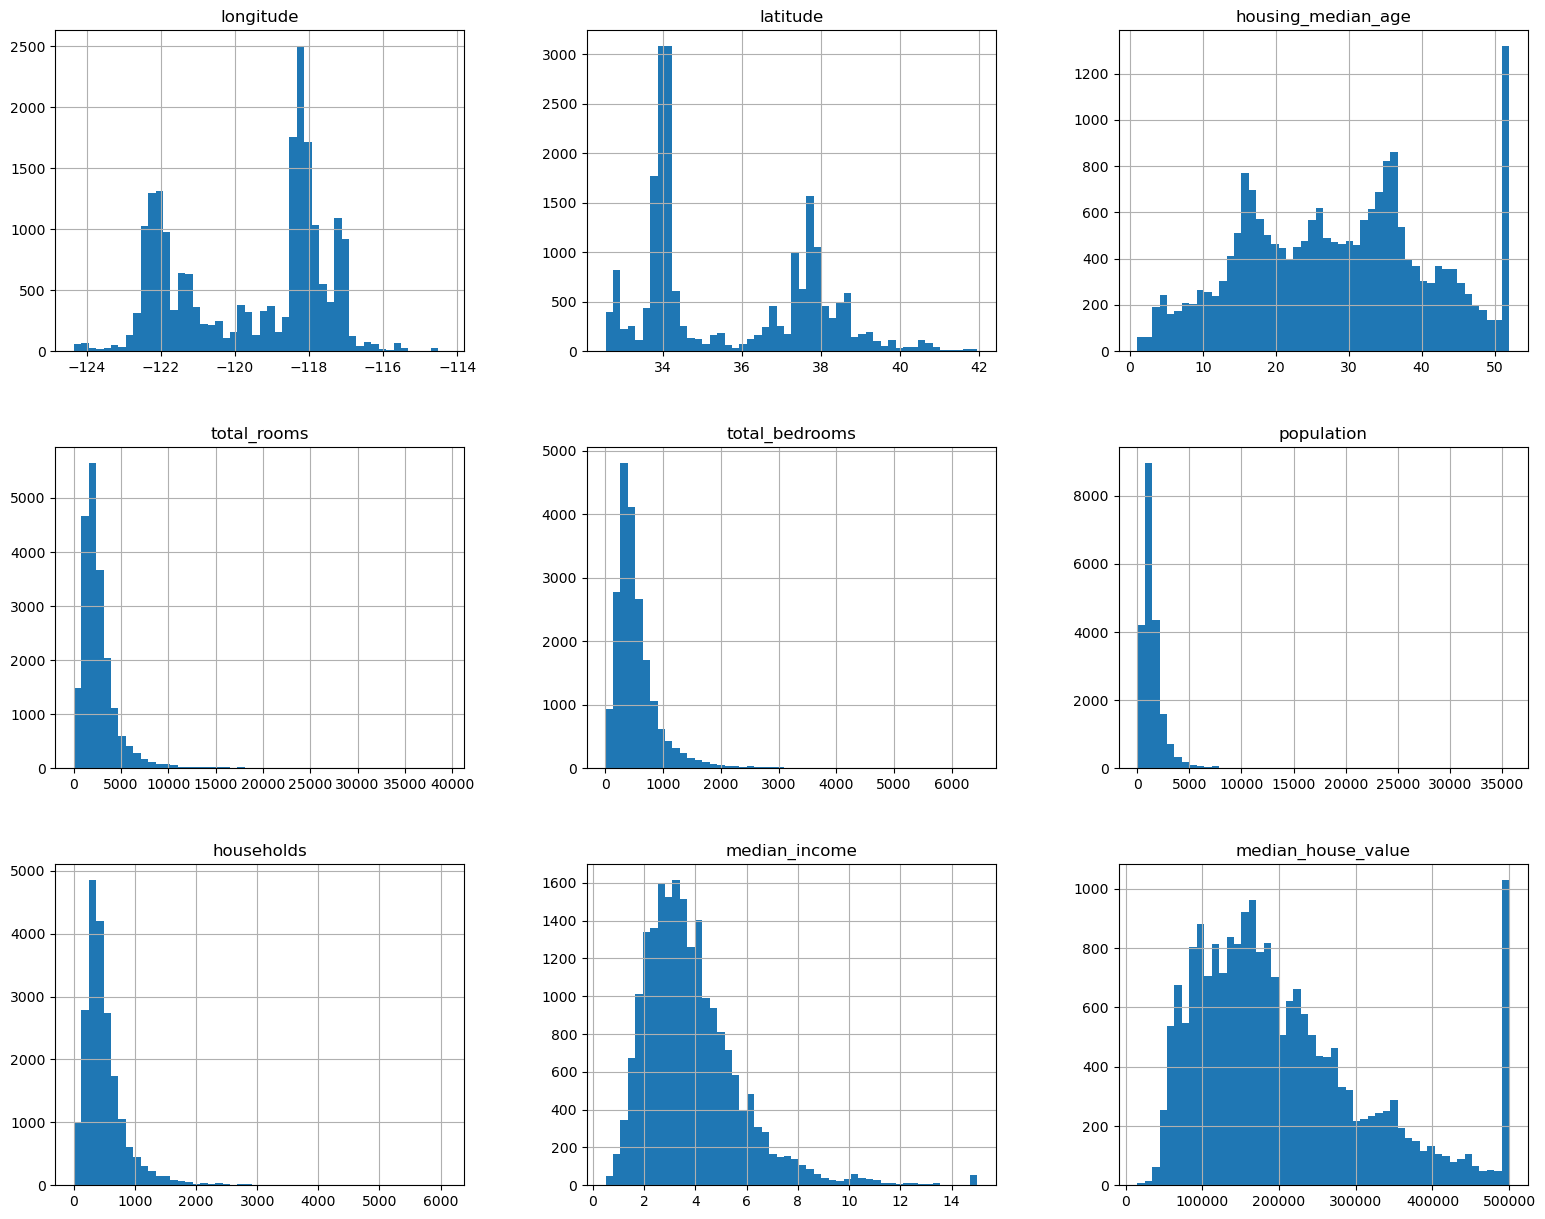

In [26]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(19,15))
plt.show

# Train sets and test sets

In [34]:
import numpy as np

def shuffle_data_and_split_data(data,test_ratio):
    shuffle_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_split_indices=shuffle_indices[:test_set_size]
    train_split_indices=shuffle_indices[test_set_size:]
    return data.iloc[train_split_indices],data.iloc[test_split_indices]

In [60]:
train_set,test_set=shuffle_data_and_split_data(housing,0.2)
len(train_set)
len(test_set)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17189,-119.32,36.20,15.0,1562.0,275.0,961.0,287.0,3.4231,83300.0,INLAND
3499,-121.99,36.98,40.0,1104.0,224.0,669.0,215.0,4.3409,256300.0,NEAR OCEAN
15450,-117.07,33.00,4.0,9153.0,1866.0,3775.0,1698.0,4.9550,241500.0,<1H OCEAN
8130,-121.28,37.95,46.0,1026.0,330.0,1109.0,333.0,1.2904,63300.0,INLAND
6073,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,203500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11124,-118.24,34.15,7.0,2063.0,670.0,1892.0,643.0,1.7301,202300.0,<1H OCEAN
3447,-120.86,37.77,28.0,1208.0,232.0,535.0,232.0,2.3523,94700.0,INLAND
2287,-122.41,37.75,52.0,1057.0,276.0,837.0,292.0,2.4531,229000.0,NEAR BAY
5122,-123.80,39.44,52.0,1533.0,336.0,754.0,340.0,1.9213,95000.0,<1H OCEAN


In [62]:
from zlib import crc32

def id_is_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))< test_ratio*2**32
def split_data_with_id_hash(data,test_ratio,id_column):
    ids=data[id_column]
    is_test_set=ids.apply(lambda id_:id_is_test_set(id_,test_ratio))
    return data.loc[~is_test_set],data.loc[is_test_set]
    

In [99]:
housing_with_index=housing.reset_index()
train_set,test_set=split_data_with_id_hash(housing_with_index,0.2,"index")
len(train_set)
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [145]:
housing_with_index["id"]=housing["longitude"]*1000+housing["latitude"]
train_set,test_set=split_data_with_id_hash(housing_with_index,0.2,"id")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [151]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
len(train_set)

16512

In [153]:
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3,4.5,6,np.inf],
                            labels=[1,2,3,4,5])

<Axes: xlabel='income_cat'>

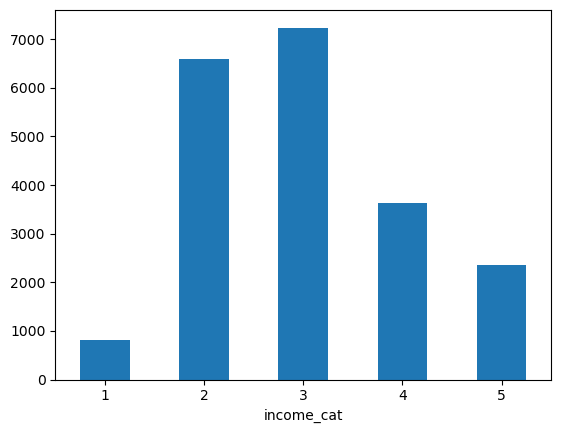

In [163]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)

In [167]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

strat_splits=[]

for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])
    


In [187]:
strat_train_set,strat_test_set=strat_splits[0]
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [189]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing["income_cat"])

In [195]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [197]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",inplace=True,axis=1)

In [199]:
strat_train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3302,-120.61,35.11,11.0,3733.0,831.0,1839.0,739.0,3.3062,158500.0,<1H OCEAN
14414,-117.98,33.73,22.0,4232.0,624.0,2408.0,660.0,6.6539,284900.0,<1H OCEAN
20399,-121.87,37.39,16.0,1334.0,389.0,1103.0,415.0,3.7153,229800.0,<1H OCEAN
7533,-122.37,37.59,52.0,2272.0,403.0,963.0,376.0,5.7245,500000.0,NEAR OCEAN
155,-117.18,32.84,30.0,2290.0,523.0,1272.0,472.0,3.5606,165100.0,NEAR OCEAN


In [205]:
housing=strat_train_set.copy()


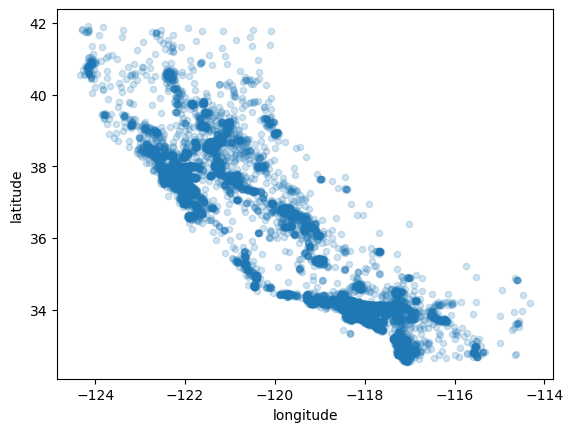

In [219]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

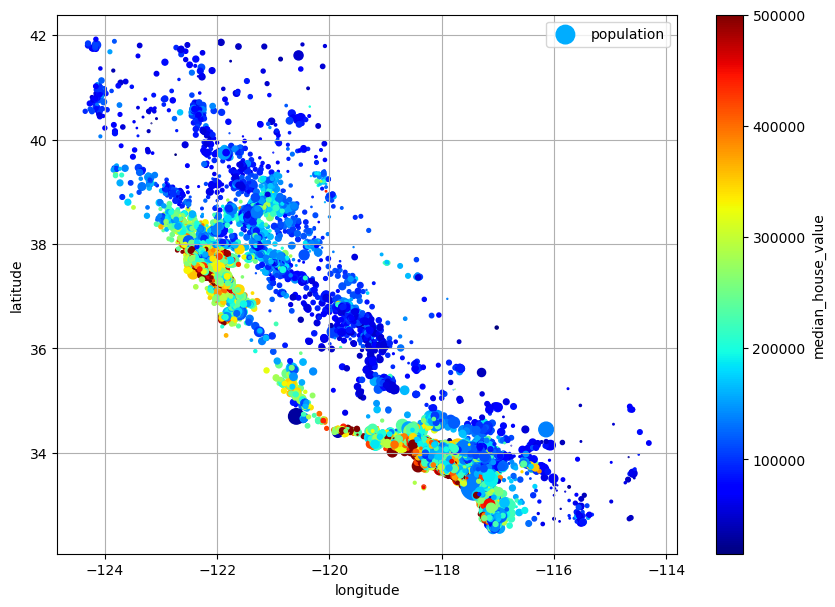

In [233]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,
            s=housing["population"]/100,label="population",
            c="median_house_value",cmap="jet",sharex=False,figsize=(10, 7))

<function matplotlib.pyplot.show(close=None, block=None)>

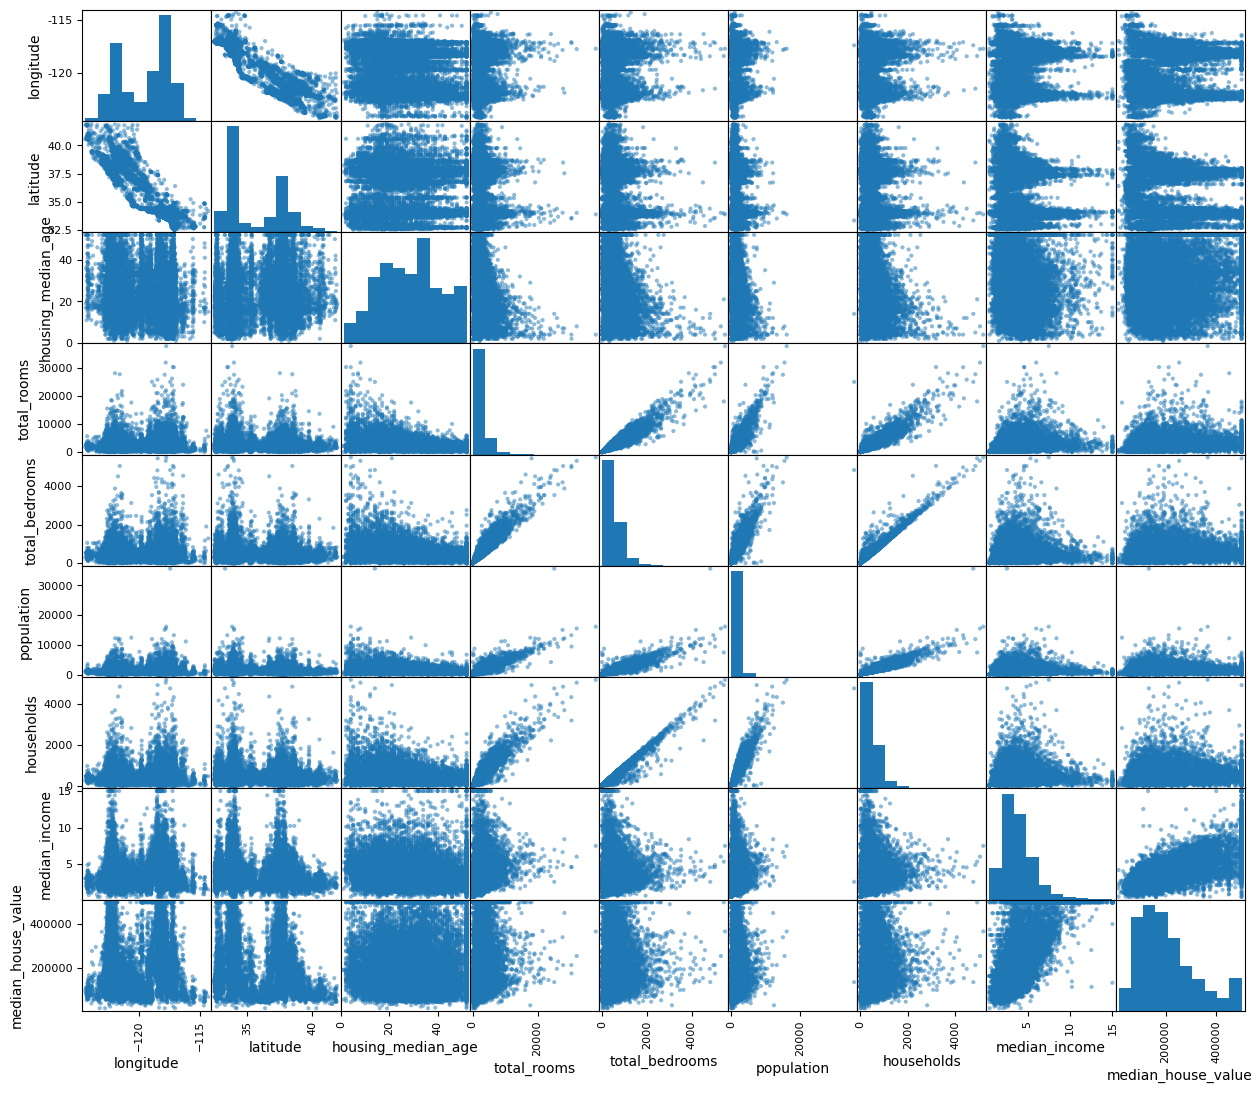

In [239]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing,figsize=(15,13))
plt.show

# Clean The Data

In [242]:
from sklearn.impute import SimpleImputer

impture=SimpleImputer(strategy="median")

In [244]:
housing_num=housing.select_dtypes(include=[np.number])

In [246]:
impture.fit(housing_num)

SimpleImputer(strategy='median')

In [248]:
X=impture.transform(housing_num)


In [250]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [254]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 3302 to 15955
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


# Handling text and categorial data

In [257]:
housing_cat=housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
3302,<1H OCEAN
14414,<1H OCEAN
20399,<1H OCEAN
7533,NEAR OCEAN
155,NEAR OCEAN
...,...
18515,<1H OCEAN
4512,INLAND
16343,<1H OCEAN
3099,<1H OCEAN


In [259]:
from sklearn.preprocessing import OrdinalEncoder
ordinalenc=OrdinalEncoder()
housing_cat_encoded=ordinalenc.fit_transform(housing_cat)

In [263]:
housing_cat_encoded[:8]

array([[0.],
       [0.],
       [0.],
       [4.],
       [4.],
       [1.],
       [0.],
       [1.]])

In [267]:
ordinalenc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [269]:
housing_cat

,ocean_proximity
3302,<1H OCEAN
14414,<1H OCEAN
20399,<1H OCEAN
7533,NEAR OCEAN
155,NEAR OCEAN
...,...
18515,<1H OCEAN
4512,INLAND
16343,<1H OCEAN
3099,<1H OCEAN


In [271]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
housing_cat_onehot=onehotencoder.fit_transform(housing_cat)

In [275]:
housing_cat_onehot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [277]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3302,-120.61,35.11,11.0,3733.0,831.0,1839.0,739.0,3.3062,158500.0,<1H OCEAN
14414,-117.98,33.73,22.0,4232.0,624.0,2408.0,660.0,6.6539,284900.0,<1H OCEAN
20399,-121.87,37.39,16.0,1334.0,389.0,1103.0,415.0,3.7153,229800.0,<1H OCEAN
7533,-122.37,37.59,52.0,2272.0,403.0,963.0,376.0,5.7245,500000.0,NEAR OCEAN
155,-117.18,32.84,30.0,2290.0,523.0,1272.0,472.0,3.5606,165100.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
18515,-118.19,33.93,40.0,1334.0,276.0,1226.0,278.0,3.4712,144300.0,<1H OCEAN
4512,-121.44,38.61,34.0,172.0,38.0,149.0,55.0,2.6442,55000.0,INLAND
16343,-121.82,37.38,32.0,3747.0,665.0,1687.0,649.0,5.4949,330800.0,<1H OCEAN
3099,-118.37,34.09,24.0,630.0,172.0,257.0,147.0,5.5224,400000.0,<1H OCEAN
